Select a category:
1. Mathematics
2. Physics
3. Chemistry
4. Animals
5. Vegetables
6. Biology
7. Asia Country Maps
8. Richest Countries
9. Smartphones


Enter category number:  6
Choose an example: Cell Structure, DNA Helix, Heart Anatomy, Neuron, Photosynthesis, Human Skeleton, Respiratory System, Digestive System, Plant Cell, Bacteria Structure
Enter choice:  "Draw the double-helix structure of DNA


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

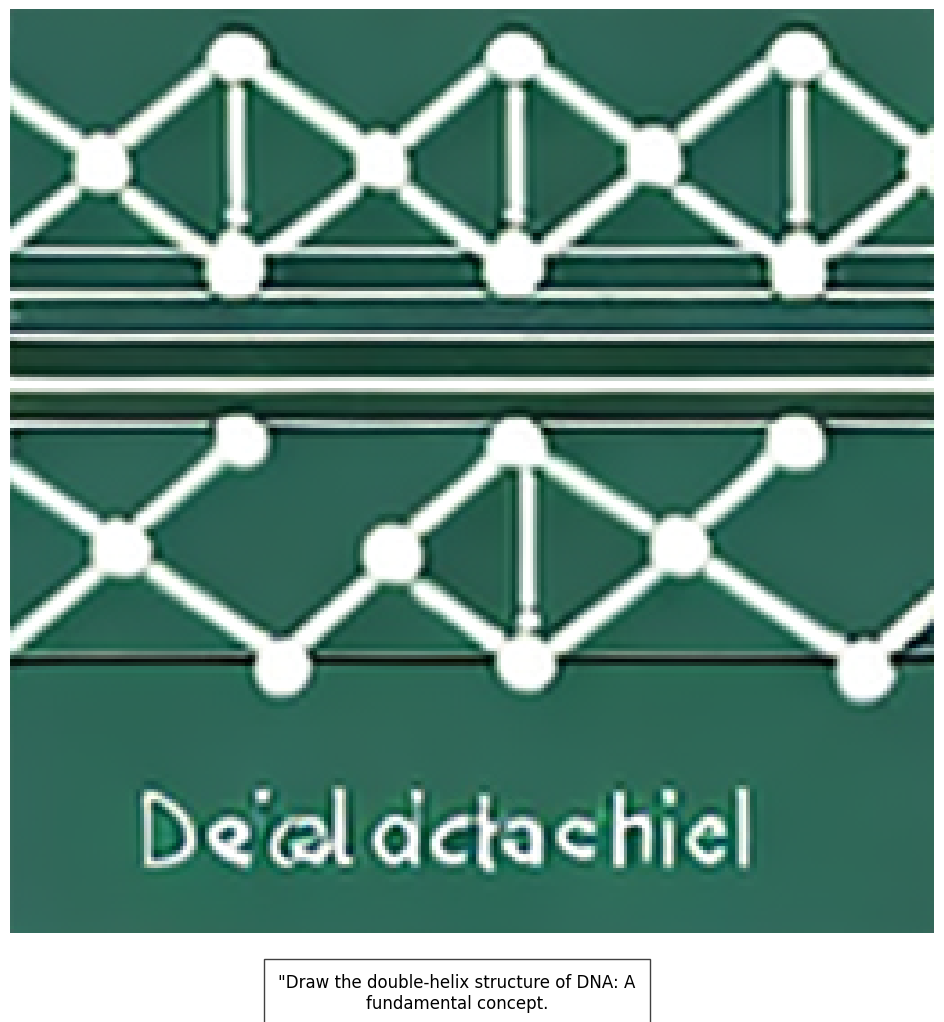

In [6]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import textwrap
import numpy as np

# Define categories
CATEGORIES = ["Mathematics", "Physics", "Chemistry", "Animals", "Vegetables", "Biology", "Asia Country Maps", "Richest Countries", "Smartphones"]

MATH_EXAMPLES = {
    "Square with Diagonals": "Draw a square ABCD with diagonals intersecting at O. Label all points and mark the right angles.",
    "Linear Equation": "Plot the linear equation y = 2x + 3 on a Cartesian plane.",
    "Unit Circle": "Illustrate a unit circle with angles 30°, 45°, and 60°, showing their sine and cosine values.",
    "Venn Diagram": "Create a Venn diagram for two sets: A (students who play football) and B (students who play basketball).",
    "Pie Chart": "Show a pie chart of students' favorite colors: Red (25%), Blue (30%), Green (20%), Yellow (25%)."
}

PHYSICS_EXAMPLES = {
    "Free-Body Diagram": "Draw a free-body diagram of a box on an inclined plane with forces labeled.",
    "Newton's Third Law": "Show Newton’s third law with an example of a person pushing a wall.",
    "Magnetic Field": "Show the magnetic field lines around a bar magnet.",
    "Concave Mirror": "Illustrate a concave mirror with an object placed beyond the focal point, showing the reflected rays.",
    "Nuclear Fission": "Illustrate the nuclear fission process of Uranium-235."
}

CHEMISTRY_EXAMPLES = {
    "Bohr Model": "Illustrate the Bohr model of a carbon atom, showing protons, neutrons, and electrons.",
    "Periodic Table": "Highlight the alkali metals in the periodic table.",
    "Lewis Structure": "Draw a Lewis dot structure for a water (H₂O) molecule.",
    "pH Scale": "Illustrate the pH scale with examples of substances from acidic to basic.",
    "Energy Profile": "Illustrate an energy profile diagram for an exothermic reaction."
}

ANIMALS_EXAMPLES = {
    "Lion": "Illustrate a lion in a savanna habitat.",
    "Elephant": "Draw an elephant with large ears and a trunk.",
    "Tiger": "Show a Bengal tiger in the jungle.",
    "Giraffe": "Illustrate a giraffe eating leaves from a tall tree.",
    "Zebra": "Draw a zebra with its black-and-white stripes.",
    "Penguin": "Illustrate a penguin sliding on ice.",
    "Dolphin": "Draw a dolphin jumping out of the water.",
    "Eagle": "Show an eagle soaring in the sky.",
    "Kangaroo": "Illustrate a kangaroo with a baby in its pouch.",
    "Panda": "Draw a panda eating bamboo."
}

VEGETABLES_EXAMPLES = {
    "Carrot": "Illustrate a fresh carrot with green leaves.",
    "Tomato": "Draw a ripe tomato with water droplets.",
    "Potato": "Show a group of potatoes in a basket.",
    "Cabbage": "Illustrate a whole cabbage and a sliced half.",
    "Broccoli": "Draw a healthy broccoli head.",
    "Pumpkin": "Illustrate a pumpkin with a carved Halloween face.",
    "Onion": "Show a peeled onion with layers.",
    "Garlic": "Draw garlic bulbs and cloves.",
    "Chili Pepper": "Illustrate a red chili pepper.",
    "Corn": "Draw a corn cob with yellow kernels."
}

BIOLOGY_EXAMPLES = {
    "Cell Structure": "Illustrate an animal cell with labeled organelles.",
    "DNA Helix": "Draw the double-helix structure of DNA.",
    "Heart Anatomy": "Illustrate the human heart with chambers labeled.",
    "Neuron": "Draw a neuron showing dendrites and axon.",
    "Photosynthesis": "Illustrate the process of photosynthesis in a leaf.",
    "Human Skeleton": "Show the major bones of the human skeleton.",
    "Respiratory System": "Illustrate the lungs and the process of breathing.",
    "Digestive System": "Draw the human digestive system with labeled parts.",
    "Plant Cell": "Illustrate a plant cell with chloroplasts.",
    "Bacteria Structure": "Draw a bacteria cell with its components."
}

ASIA_COUNTRY_MAPS = {
    "China": "Draw the political map of China.",
    "India": "Illustrate India's states and major cities.",
    "Japan": "Show Japan's major islands and cities.",
    "South Korea": "Illustrate South Korea’s regions.",
    "Indonesia": "Draw the map of Indonesia with its islands.",
    "Saudi Arabia": "Show the map of Saudi Arabia with key landmarks.",
    "Thailand": "Illustrate Thailand’s map with major regions.",
    "Vietnam": "Draw Vietnam’s provinces and capital.",
    "Malaysia": "Illustrate Malaysia with major states.",
    "Pakistan": "Show Pakistan’s provinces and borders."
}

RICH_COUNTRIES = {
    "United States": "Illustrate the political map of the United States.",
    "China": "Draw the economic zones of China.",
    "Japan": "Show Japan with its major economic hubs.",
    "Germany": "Illustrate Germany with its financial districts.",
    "United Kingdom": "Draw the UK, highlighting London’s financial center.",
    "France": "Illustrate the economic map of France.",
    "India": "Show India's fastest-growing cities.",
    "Italy": "Draw Italy with a focus on industrial regions.",
    "Canada": "Illustrate the wealth distribution in Canada.",
    "South Korea": "Show South Korea’s tech hubs."
}

SMARTPHONES = {
    "iPhone 15 Pro": "Illustrate an iPhone 15 Pro with its triple-camera system.",
    "Samsung Galaxy S23 Ultra": "Draw a Samsung Galaxy S23 Ultra with its stylus.",
    "Google Pixel 8": "Illustrate a Google Pixel 8 highlighting its AI features.",
    "OnePlus 11": "Show a OnePlus 11 with its sleek design.",
    "Xiaomi Mi 13 Pro": "Illustrate a Xiaomi Mi 13 Pro with a large display.",
    "Sony Xperia 1 V": "Draw a Sony Xperia 1 V with a focus on its camera capabilities.",
    "Oppo Find X5 Pro": "Illustrate an Oppo Find X5 Pro with curved edges.",
    "Vivo X90 Pro": "Show a Vivo X90 Pro highlighting its camera bump.",
    "Asus ROG Phone 7": "Illustrate an Asus ROG Phone 7 with RGB lighting.",
    "Nothing Phone (2)": "Draw a Nothing Phone (2) with its transparent back design."
}


# Other categories remain unchanged...

def generate_image(prompt, output_path="generated.png"):
    model_id = "stabilityai/sd-turbo"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe.to("cuda" if torch.cuda.is_available() else "cpu")
    image = pipe(prompt, negative_prompt="blur,irrelevant", width=256, height=256, num_inference_steps=50,
             guidance_scale=2, num_images_per_prompt=1).images[0]
    image.save(output_path)
    return image

def display_summary(image_path, prompt, summary):
    image = Image.open(image_path)
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(image)
    ax.axis("off")
    wrapped_summary = textwrap.fill(f"{prompt}: {summary}", width=50)
    plt.figtext(0.5, 0.05, wrapped_summary, wrap=True, horizontalalignment='center', fontsize=12, bbox={"facecolor":"white", "alpha":0.75, "pad":10})
    plt.show()

def main():
    print("Select a category:")
    for i, cat in enumerate(CATEGORIES, 1):
        print(f"{i}. {cat}")
    category_choice = int(input("Enter category number: ")) - 1
    category = CATEGORIES[category_choice]
    
    examples = {
        "Mathematics": MATH_EXAMPLES,
        "Physics": PHYSICS_EXAMPLES,
        "Chemistry": CHEMISTRY_EXAMPLES,
        "Animals": ANIMALS_EXAMPLES,
        "Vegetables": VEGETABLES_EXAMPLES,
        "Biology": BIOLOGY_EXAMPLES,
        "Asia Country Maps": ASIA_COUNTRY_MAPS,
        "Richest Countries": RICH_COUNTRIES,
        "Smartphones": SMARTPHONES
    }
    
    if category in examples:
        prompt = input(f"Choose an example: {', '.join(examples[category].keys())}\nEnter choice: ")
        summary = examples[category].get(prompt, "A fundamental concept.")
    else:
        print("Invalid selection.")
        return
    
    generate_image(prompt, "generated.png")
    display_summary("generated.png", prompt, summary)

if __name__ == "__main__":
    main()
